# Matplotlib Showcase
This notebook closely follows the Earth and Enviromental Data Science course at https://earth-env-data-science.github.io/intro.html

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import urllib
import pandas as pd
import numpy as np
import xarray as xr
%matplotlib inline

Done


# Line Plots

In [2]:
header_url = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/HEADERS.txt'
with urllib.request.urlopen(header_url) as response:
    data = response.read().decode('utf-8')
lines = data.split('\n')
headers = lines[1].split(' ')[:-1]

ftp_base = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/'
dframes = []
for year in range(2016, 2019):
    data_url = f'{year}/CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(ftp_base + data_url, parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

units = ['XXXXX', 'YYYYMMDD', 'XXXXXX','Decimal_degrees', 'Decimal_degrees', 'Celsius', 'Celsius', 
         'Celsius', 'Celsius', 'mm', 'MJ/m^2', 'X', 'Celsius', 'Celsius', 'Celsius', '%', '%', '%',
         'm^3/m^3', 'm^3/m^3', 'm^3/m^3', 'm^3/m^3', 'm^3/m^3', 'Celsius', 'Celsius', 'Celsius',
         'Celsius', 'Celsius']

#for name, unit in zip(headers, units):
#    print(f'{name}: {unit}')


Text(0.5, 0, 'Date')

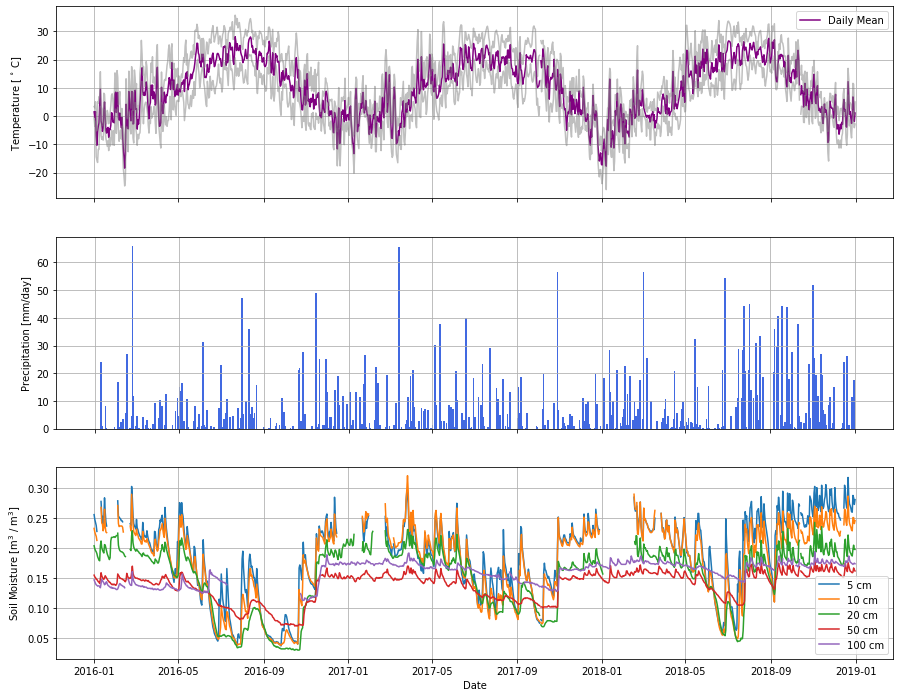

In [3]:
# My Code

# Set up a subplot with 3 figures
fig, axes = plt.subplots(figsize=(15, 12), nrows=3, ncols=1)

# Daily Temperature Plot
axes[0].plot(date, t_daily_mean, color='purple', label = 'Daily Mean')
axes[0].plot(date, t_daily_min, color = 'grey', alpha = 0.5)
axes[0].plot(date, t_daily_max, color = 'grey', alpha = 0.5)
axes[0].legend(loc = 1)
axes[0].grid()
axes[0].set_ylabel("Temperature [ $^{\circ}$ C]")
axes[0].xaxis.set_ticklabels([])

# Daily Percipitation Plot
axes[1].bar(date, p_daily_calc, width = 2.5, color = 'royalblue')
axes[1].grid()
axes[1].xaxis.set_ticklabels([])
axes[1].set_ylabel("Precipitation [mm/day]")

# Soil Moisture Plot
soilArray = [soil_moisture_5, soil_moisture_10, soil_moisture_20,
                     soil_moisture_50, soil_moisture_100]

soilLabels =  ['5', '10', '20', '50', '100']

for i in range(len(soilArray)):
    axes[2].plot(date, soilArray[i], label = '{} cm'.format(soilLabels[i]))
    
axes[2].legend()
axes[2].grid()
axes[2].set_ylabel("Soil Moisture [m$^{3}$ / m$^{3}$]")
axes[2].set_xlabel("Date")


# Contour Plots

In [8]:
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values
print("done")

done


Text(0, 0.5, 'Latitude')

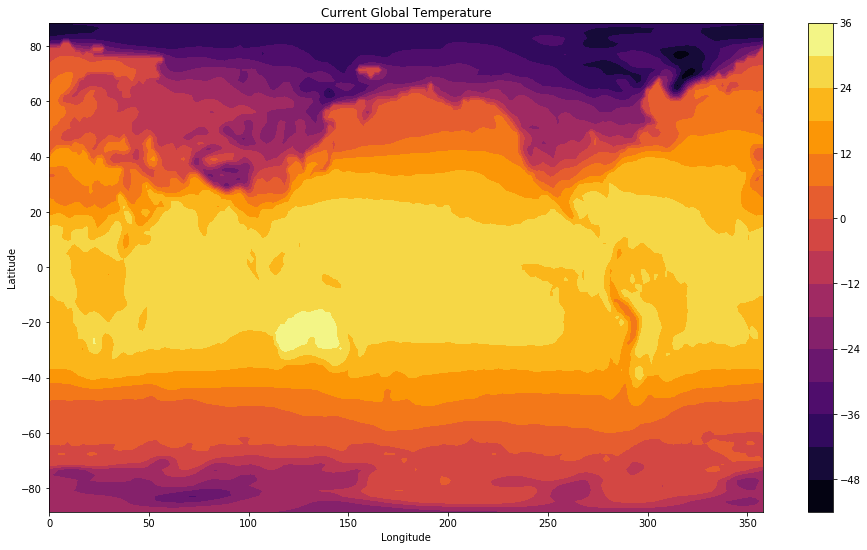

In [81]:
# My Code

plt.figure(figsize=(16, 9))
plt.contourf(lon, lat, temp,15, cmap ='inferno')
plt.colorbar()
plt.title("Current Global Temperature")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Contour Plot onto World Map

In [82]:
# Convenience routine from https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

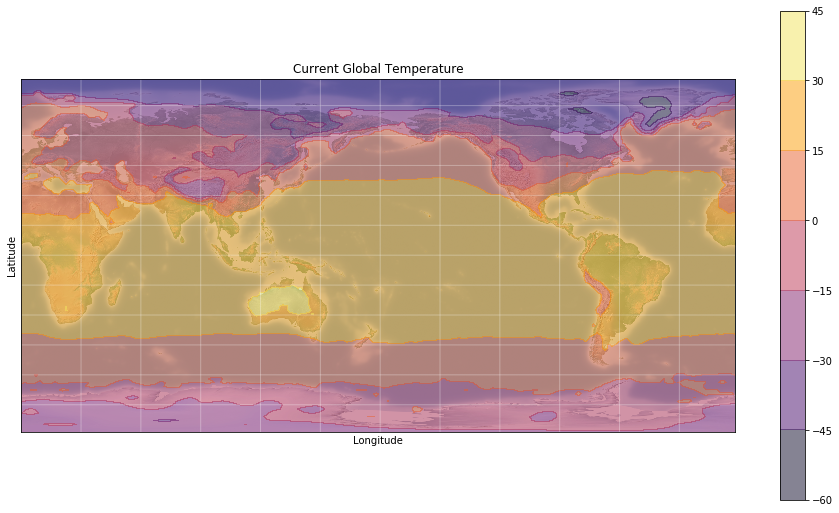

In [103]:
fig = plt.figure(figsize=(16, 9), edgecolor='w')

# Lat/Lon mat/min not fitted exactly right
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-88.54196, urcrnrlat=88.54196,
            llcrnrlon=0, urcrnrlon=358.125, )
draw_map(m)

plt.contourf(lon, lat, temp,5, cmap ='inferno', alpha = 0.5)
plt.colorbar()
plt.title("Current Global Temperature")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Scatter Plots

In [104]:
!curl -L -o earthquakes.tsv "https://drive.google.com/uc?export=download&id=1dFZ4LbwNaw-Gr0G-ZlPAZ17n2qCkdQBP"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100   388    0   388    0     0    313      0 --:--:--  0:00:01 --:--:--   313

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  796k  100  796k    0     0   463k      0  0:00:01  0:00:01 --:--:-- 9056k


In [105]:
#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOT!
#########################################################

earthquakes = np.genfromtxt('earthquakes.tsv', delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]


C:\Users\philipc2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


Text(0, 0.5, 'Latitude')

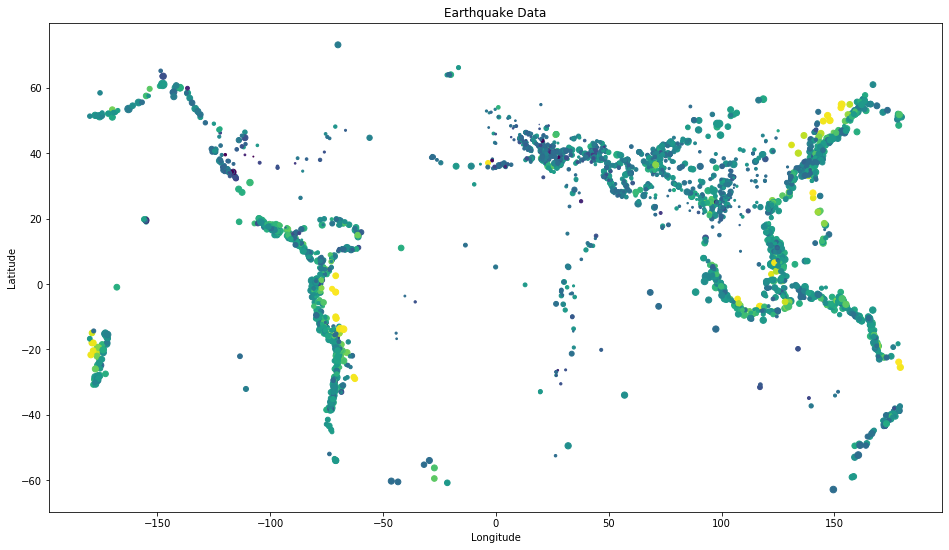

In [129]:
fig = plt.figure(figsize=(16, 9), edgecolor='w')
colorArray = np.log10(depth)
sizeArray = magnitude**4 / 100.0
plt.scatter(longitude, latitude, s = sizeArray, c = colorArray)

plt.title("Earthquake Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Scatter Plot onto World Map

Text(0, 0.5, 'Latitude')

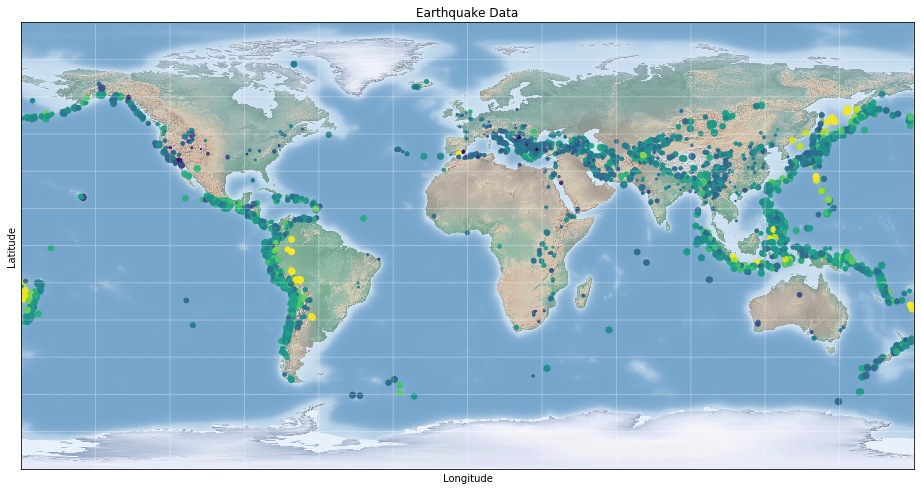

In [130]:
fig = plt.figure(figsize=(16, 9), edgecolor='w')

m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90.0, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)
plt.scatter(longitude, latitude, s = sizeArray, c = colorArray)
plt.title("Earthquake Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")